<a href="https://colab.research.google.com/github/anudeeplearning/Market-Risk/blob/main/historical_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We calculate the VaR using the historical var method. This is a non-parametric method.

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 36.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf, numpy as np, pandas as pd, datetime as dt, matplotlib.pyplot as plt, scipy.stats as scs
from scipy.stats import norm

In [ ]:
tickers = ['AAPL', 'FB', 'C','DIS','F','MSFT','MS','GME','TSLA','AMZN']
weights = np.array(10*[0.1])

In [ ]:
start = dt.datetime(2019,1,1)
end=dt.datetime.now()

df=yf.download(tickers,start,end)['Adj Close']
df

In [ ]:
returns = df.pct_change()

In [ ]:
returns

,AAPL,AMZN,C,DIS,F,FB,GME,MS,MSFT,TSLA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.025242,-0.018121,-0.024227,-0.015190,-0.029039,-0.007651,-0.017822,-0.036788,-0.031472
2019-01-04,0.042689,0.050064,0.048897,0.030847,0.038560,0.047138,0.175019,0.040827,0.046509,0.057697
2019-01-07,-0.002226,0.034353,0.008706,0.008667,0.025990,0.000725,0.015748,0.009927,0.001275,0.054361
2019-01-08,0.019063,0.016612,-0.002697,0.007779,0.009650,0.032452,0.021318,-0.006233,0.007251,0.001164
...,...,...,...,...,...,...,...,...,...,...
2022-05-26,0.023200,0.040295,0.026376,0.022758,0.032258,0.042431,0.115395,0.033686,0.012875,0.074271
2022-05-27,0.040757,0.036632,-0.008689,0.035129,0.038872,0.018264,0.068115,0.017059,0.027604,0.073333
2022-05-31,-0.005346,0.043970,-0.003916,0.010245,0.003668,-0.007636,-0.090883,-0.003586,-0.005014,-0.001804


In [ ]:
portfolio_returns = returns @ weights

In [ ]:
portfolio_returns

Date
2019-01-02         NaN
2019-01-03   -0.030516
2019-01-04    0.057825
2019-01-07    0.015753
2019-01-08    0.010636
                ...   
2022-05-26    0.042354
2022-05-27    0.034708
2022-05-31   -0.006030
2022-06-01   -0.011593
2022-06-02    0.030453
Length: 862, dtype: float64

In [ ]:
x=portfolio_returns.sort_values()

In [ ]:
x

Date
2020-03-16   -0.123834
2020-03-12   -0.104239
2020-03-09   -0.090666
2020-06-11   -0.077275
2020-03-18   -0.067712
                ...   
2020-03-13    0.110392
2021-01-27    0.112020
2021-02-24    0.120245
2020-03-24    0.127444
2019-01-02         NaN
Length: 862, dtype: float64

In [ ]:
import scipy.stats as scs

In [ ]:
confidence_intervals = [0.01,0.1,1.0,2.5,5.0,10.0]
var = [x[int(i*len(x)//100)] for i in confidence_intervals]

In [ ]:
var

[-0.12383374290763866,
 -0.12383374290763866,
 -0.05225999541938922,
 -0.04185644807148391,
 -0.03137489863023041,
 -0.02065239856469193]

In [ ]:
df = pd.DataFrame(var, confidence_intervals,columns = ['VaR'])
df

,VaR
0.01,-0.122147
0.10,-0.106963
1.00,-0.052127
2.50,-0.041534
5.00,-0.031352
10.00,-0.020637


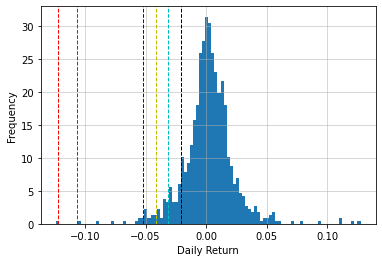

In [ ]:
plt.hist(portfolio_returns, density = True, bins = 100)

plt.axvline(df.loc[0.01]['VaR'], color='r', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[0.1]['VaR'], color='g', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[1]['VaR'], color='b', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[2.5]['VaR'], color='y', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[5]['VaR'], color='c', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[10]['VaR'], color='k', linestyle='dashed',linewidth=1)

plt.ylabel('Frequency')
plt.xlabel('Daily Return')
plt.grid(True,linewidth = 0.5)
plt.show()

In [ ]:
num_days=10
var_reg = df.loc[1.0]['VaR']*(num_days)**(1/2)
var_reg

-0.16483914011140088

We assume that distribution is stationary 10day. 
The regulary VaR is calculated as 99%VaR is 10*1day 99%VaR which is 16.48%